# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.1A: Greedy policy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Let's define an interface of a policy. For a start, the policy should know how many actions it can take and able to take a particular action given that policy

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a greedy policy based on the policy interface. The greedy policy will take the most rewarding action (i.e greedy). This is implemented in the act() function. In addition, we will maintain the name of the policy (name), the rewards it has accumulated for each action (total_rewards), and the number of times an action has been performed (total_counts).

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

We are now ready to perform our first simulation. Let's set some parameters.

In [4]:
evaluation_seed = 8026
num_actions = 5
trials = 10000
distribution = "bernoulli"

Now, put the pieces together and run the experiment.

Distribution: bernoulli [0.4561754  0.22507755 0.82070893 0.05221751 0.03428511]
Optimal arm: 2


<Figure size 720x360 with 0 Axes>

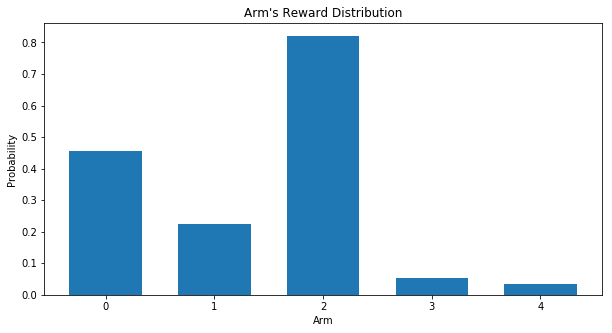

--------------------------------------------------
Policy: Greedy 
Average Reward: 0.4586 
Average Regret: 0.3646027658185429
Arm pulls: [9.996e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00]


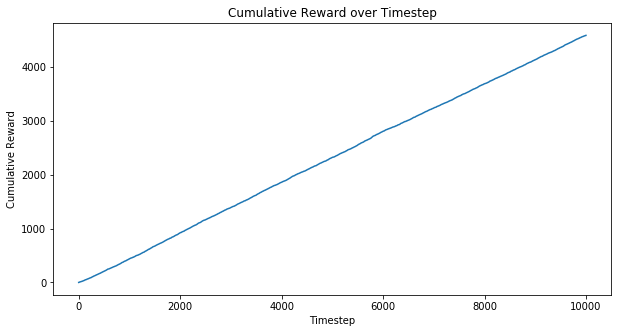

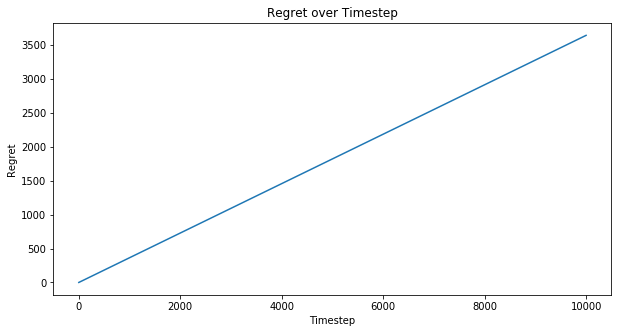

In [5]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = Greedy(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Observe the above results and answer the lab questions!